In [1]:
from weldx import Q_
from weldx.measurement import MeasurementChain, GenericEquipment, SignalTransformation, SignalSource, Signal, Error

In [2]:
source_current = SignalSource("Current measurement", 
                      output_signal=Signal(signal_type="analog",
                                           unit="V",
                                           data=[1,3,5]),
                      error=Error(Q_(1, "percent"))
                     )
source_voltage = SignalSource("Voltage measurement", 
                      output_signal=Signal(signal_type="analog",
                                           unit="V",
                                           data=[0,-1,-2]),
                      error=Error(Q_(1, "percent"))
                     )

In [3]:
AD_current = SignalTransformation("AD conversion current measurement",
                                 error=Error(Q_(0, "percent")),
                                 input_signal=Signal(signal_type="analog",
                                                     unit="V"),
                                 output_signal=Signal(signal_type="digital",
                                                      unit="",
                                                      data = [10,12,13])
                                 )
AD_voltage = SignalTransformation("AD conversion voltage measurement",
                                 error=Error(Q_(0.2, "percent")),
                                 input_signal=Signal(signal_type="analog",
                                                     unit="V"),
                                 output_signal=Signal(signal_type="digital",
                                                      unit="",
                                                      data = [-10,-12,-13])
                                 )

calibration_current = SignalTransformation("Current measurement calibration",
                                 error=Error(Q_(1.2, "percent")),
                                 input_signal=Signal(signal_type="digital",
                                                     unit=""),
                                 output_signal=Signal(signal_type="digital",
                                                      unit="A",
                                                      data = [100,102,103])
                                 )
calibration_voltage = SignalTransformation("Voltage measurement calibration",
                                 error=Error(Q_(0.7, "percent")),
                                 input_signal=Signal(signal_type="digital",
                                                     unit=""),
                                 output_signal=Signal(signal_type="digital",
                                                      unit="V", 
                                                      data = [-100,-102,-103])
                                 )

In [4]:
equipment = GenericEquipment(name="Jack of all trades",
                             sources=[source_current, source_voltage],
                             data_transformations=[AD_current, AD_voltage, calibration_current, calibration_voltage]
                            )

In [5]:
equipment.source_names

['Current measurement', 'Voltage measurement']

In [6]:
mc_current = MeasurementChain.construct_from_equipment("Current Measurement Chain", equipment, "Current measurement")
mc_current.add_transformation_from_equipment(equipment, transformation_name="AD conversion current measurement")
mc_current.add_transformation_from_equipment(equipment, transformation_name="Current measurement calibration")

Signal(signal_type='digital', unit='', data=[10, 12, 13])
Signal(signal_type='digital', unit='A', data=[100, 102, 103])


<AxesSubplot:title={'center':'Current Measurement Chain'}>

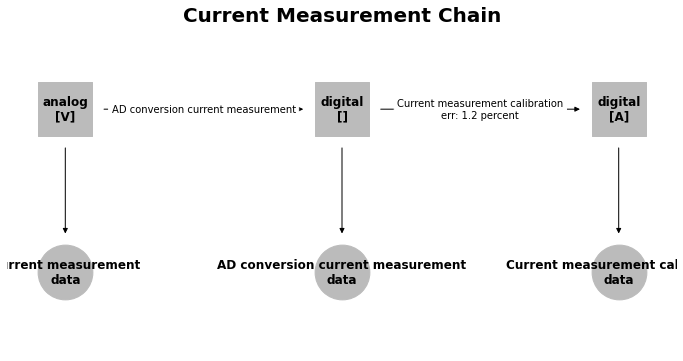

In [7]:
mc_current.plot()

In [8]:
mc_current.get_signal_data("Current measurement")

[1, 3, 5]

In [9]:
mc_current.get_signal_data("AD conversion current measurement")

[10, 12, 13]

In [10]:
mc_current.get_signal_data("Current measurement calibration")

[100, 102, 103]

In [11]:
try:
    mc_current.add_transformation_from_equipment(equipment, transformation_name="Current measurement calibration")
except Exception as e:
    print(e)

The provided transformations input signal is incompatible to the output signal of Current measurement calibration:
transformation: digital in []
output signal : digital in [A]


In [12]:
mc_voltage = MeasurementChain.construct_from_equipment("Voltage Measurement Chain", equipment, "Voltage measurement")
mc_voltage.add_transformation_from_equipment(equipment, transformation_name="AD conversion voltage measurement")
mc_voltage.add_transformation_from_equipment(equipment, transformation_name="Voltage measurement calibration")

Signal(signal_type='digital', unit='', data=[-10, -12, -13])
Signal(signal_type='digital', unit='V', data=[-100, -102, -103])


<AxesSubplot:title={'center':'Voltage Measurement Chain'}>

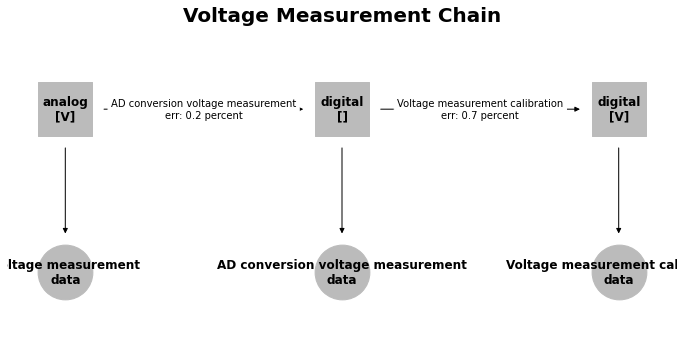

In [13]:
mc_voltage.plot()